# Quality of Estimators
**Reading: Emile-Geay 5.IV**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn

# These are some parameters to make figures nice (and big)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Monte Carlo Approach / synthetic data

## One actual experiment
Imagine we can design an experiment that takes $n$ independent and
identical measurements of a random process $X$. Each measurement
can be considered a draw from the same random process, and thus modelled as an independent and identically distributed random variable $X_{i}\sim X$. We then want to model our process $X$ and estimate some parameter $\theta$ of the model using an estimator $\hat{\theta}$, 

$$\hat\theta=f(\{X_i\})$$

<img src="M02_fig_n_measurements.png" alt="n measurements" style="width:300px;"/>

```{Important}
The quality of an estimator describes ***how close to the true value of the parameter $\theta_{true}$ can we get using an estimator $\hat{\theta}$ and $n$ data points***.
```


It can be that you are planning an experiment or field expedition and want to know how many
measurements you need to take. Perhaps you are planning
a field work to measure precipitation in South America, and
you need to know how many days you should be out there. Or you are planning on
going to a number of different sites around the tropical Pacific
and taking coral samples. Each measurement is going to involve significant
time and expenses, both in the field, and at home (especially if you
don't have your own mass-spectrometer). Understanding how your outcome depends on the statistical tool used and the number of observations is importan. 

It can be the case that $n$ is fixed by some external factor. Say,
you already have a dataset, and it contains $n$ observations of precipitation
or $n$ earthquakes, or $n$ boreholes. You want to know how far off from the truth you might be with those $n$ measurements. 


## 
Many hypothetical experiments. 

When analyzing the quality of an estimator we often times ask ourselves:
what if we had a lot more measurements? Or what if we could repeat
the experiment a large number of times times (figure below). This doesn't
mean that we can repeat the *actual* experiment, but we can *simulate* repeating the experiment a very large number of times ($m$ very large in the figure). This simulation allows to understand how much variability there might be
in our results. How well, or how wrong might things go?  Ultimately, this will tell us how far from the truth might we be if all we
have is our estimator $\hat{\theta}$ and $n$. 

<img src="M02_fig_m_experiments.png" alt="n experiments" style="width:400px;"/>

The general approach to understand the outcomes of any Experiment/measurement/estimation drawn from uncertain data proceeds as follows: 
- Model the random process you are interested in studying using one or more random variables.
- For one or more possible values of  $n$ (the numbe of measurements per experiment), simulate a very large number of experiments ($m$).
- Apply your estimation technique to the synthetic data generated for each experiment. This could be as simple as taking the sample mean of the $n$ measurements. 
- Look at how different estimators are distributed (i.e. how far way each of them might be from the truth).
- If $n$ is something you can change, repeat the steps above for different value of $n$



This gives us an idea of the uncertainty in our estimates. 

## Example: Sample mean and sample variance
Let' say we can take $n$ lab/field measurements of a quantity, each of them with some uncertainty $\varepsilon$: 

$$X_j= \mu +\varepsilon_j$$ 

where we can assume that $\varepsilon_j$ are the errors. If we assume the errors are random, and there is no bias or drift in the instrument, we can assume, for example, that $\varepsilon \sim \mathcal N(0,\sigma_\varepsilon^2)$. In this case, 

$$X_j~\sim \mathcal N (0,\sigma^2)$$


Let's say we can take 10 samples. We will choose a given value of $\mu_{true}$ and $\sigma^2_{true}$ and generate synthetic data. Let's start by simulating 5 experiments. For each synthetic experiment, we will estimate the sample mean and sample variance and compare it with the truth. 

We will estimate the mean using the sample mean as

$$\hat \mu = \overline{X}_n=\frac{1}{n}\sum X_i$$

while for sample variance we will us both the uncorrected and corrected sample variance estimators: 

$$\hat\sigma^2_n=s_{n}^2=\frac{1}{n}\sum (X-\overline{X}_n)^2$$

$$\hat\sigma^2_{n-1}=s_{n-1}^2=\frac{1}{n-1}\sum (X-\overline{X}_n)^2$$

The cell below shows the outcome of 5 synthetic experiments, each one taking 10 measurements, and the resulting sample mean and sample variances. 

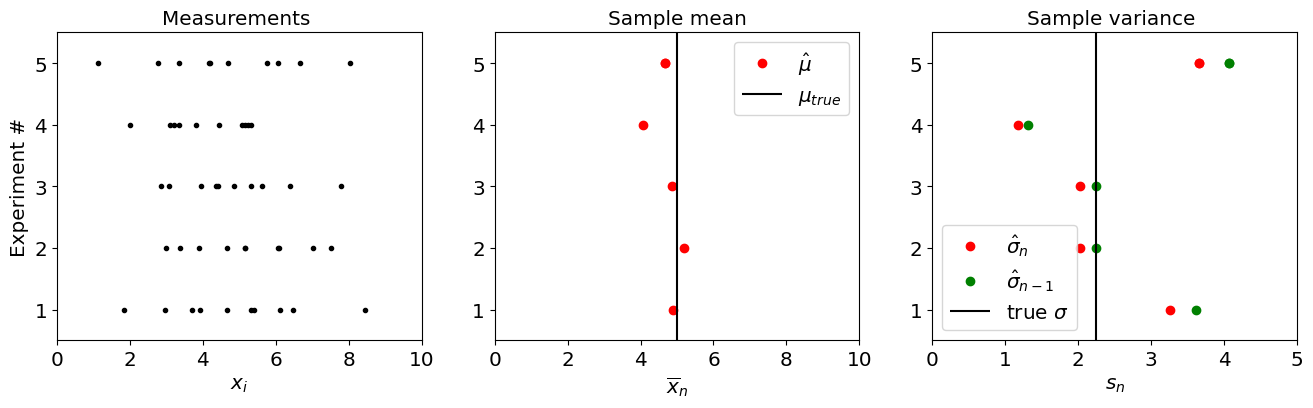

In [2]:
###### np.random.seed(seed=70)
n=10;
m=5;
loc=5
scale=1.5;
plt.subplots(1,3,figsize=[16,4])

for j in range(m): 
    X=stats.norm.rvs(loc=loc,scale=scale, size=n)
    Xn=np.mean(X);
    sn=np.var(X)
    sn1=(n/(n-1))*np.var(X)
    
    plt.subplot(1,3,1)
    plt.plot(X,j+np.ones(len(X)),'k.')
    
    
    plt.subplot(1,3,2)
    plt.plot(Xn,j+1,'ro')
    

    plt.subplot(1,3,3)
    plt.plot(sn,j+1,'ro')
    plt.plot(sn1,j+1,'go')
    
plt.subplot(1,3,1)
plt.xlim(0,10)
plt.xlabel(r'$x_i$')
plt.yticks(np.arange(1,6))
plt.ylabel('Experiment #')
plt.ylim(0.5,5.5)
plt.title('Measurements ')

plt.subplot(1,3,2)
plt.plot(Xn,j+1,'ro',label=r'$\hat\mu$')
plt.xlim(0,10)
plt.xlabel(r'$\overline{x}_n$')
plt.yticks(np.arange(1,6))
plt.title('Sample mean')
plt.vlines(loc,0.5,5.5,label=r'$\mu_{true}$',color='k')
plt.ylim(0.5,5.5)
plt.legend()

plt.subplot(1,3,3)
plt.plot(sn,j+1,'ro',label=r'$\hat \sigma_n$')
plt.plot(sn1,j+1,'go',label=r'$\hat \sigma_{n-1}$')
    
plt.xlim(0,5)
plt.xlabel(r'$s_n$')
plt.yticks(np.arange(1,6))
plt.title('Sample variance ')
plt.vlines(scale**2,0.5,5.5,label=r'true $\sigma$',color='k')
plt.ylim(0.5,5.5)
plt.legend();

Again, in reality, we will only have access to one experiment. But this Monte Carlo approach allows us to understand what is the possible range of results we could get from a single experiment. 

To get a better picture, we can crank up the number of synthetic experiment, to get a full distribution of the outcome of our estimation:

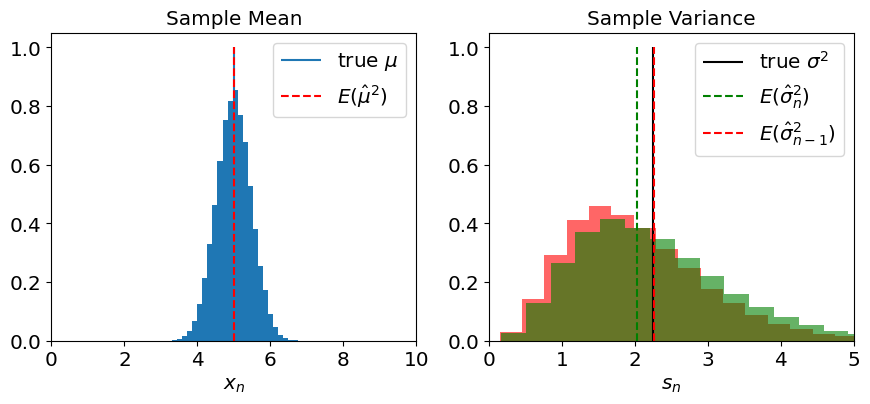

In [3]:
np.random.seed(seed=70)
n=10;
m=50000;
loc=5
scale=1.5;


Xn=np.zeros(m)
sn=np.zeros(m)
sn1=np.zeros(m)

vn=np.zeros(m)
vn1=np.zeros(m)

for j in range(m): 
    X=stats.norm.rvs(loc=loc,scale=scale, size=n)
    Xn[j]=np.mean(X);
    sn[j]=np.std(X)
    sn1[j]=np.sqrt(n/(n-1))*np.std(X)
    vn[j]=(1/n)*np.sum((X-np.mean(X))**2)
    vn1[j]=(1/(n-1))*np.sum((X-np.mean(X))**2)

plt.figure(figsize=[16,4])
X=stats.norm.rvs(loc=loc,scale=scale, size=n*m)

plt.subplot(1,3,2)
plt.hist(Xn,bins=30, density='true')
plt.xlim(0,10)
plt.xlabel(r'$x_n$')
#plt.ylabel('Experiment #')`
#plt.vlines(loc,0.5,5.5)
#plt.ylim(0.5,5.5)
plt.title('Measurements ')
plt.vlines(loc,0,1,label=r'true $\mu$')
plt.vlines(np.mean(loc),0,1,label=r'$E(\hat \mu^2$)',color='r',linestyle='--')
plt.legend()
plt.title('Sample Mean')

plt.subplot(1,3,3)
plt.hist(vn,bins=30, density='true',color='r',alpha=0.6)
plt.hist(vn1,bins=30, density='true',color='g',alpha=0.6)
plt.xlim(0,5)
plt.xlabel(r'$s_n$')
#plt.ylabel('Experiment #')
plt.vlines(scale**2,0,1,color='k',label=r'true $\sigma^2$')
plt.vlines(np.mean(vn),0,1,label=r'$E(\hat \sigma_{n}^2$)',color='g',linestyle='--')
plt.vlines(np.mean(vn1),0,1,label=r'$E(\hat \sigma_{n-1}^2$)',color='r',linestyle='--')
plt.legend()
#plt.ylim(0.5,5.5)
plt.title('Sample Variance');


### Exercise:
Repeat the analysis for a different number of measurements. 

# Uncertainty Quantification: Mean Squared Error, Bias, and Variance.

## Mean Squared Error

When we report the results of an attempt to quantify a quantity $\theta$ we usually report it as: 

$$ \theta_{true}=\hat\theta + e$$

where $e$ is the error (i.e. the difference between our truth and the estimate, $e=(\theta_{true}-\hat\theta$). 

Indeed, the distributions showed above quantify precisely the distribution of $e$, i.e. how far our estimate of a parameter $\theta$ (be it, $\mu$, or $\sigma$) is from the truth:

$$\hat \theta = \theta_{true} - e$$

The error $e$ is to some degree random (or, at least, unknown). The way we quantify the error is through it's by quantifying the mean squared error:

$$MSE=E\left[\left(\hat \theta - \theta_{true}\right)^2\right]$$

Notice that if the error is symmetric about the true value (such as for the sample mean estimator), the mean error would be zero, which is why we use the mean *squared* error. 

 
## Bias-Variance Decomposition for estimates

The mean squared error is usually decomposed into a bias term and a variance term:

$$E\left[\left(\hat{\theta}-\theta_{true}\right)^{2}\right]=E\left[\hat{\theta}^{2}-2\hat{\theta}\theta_{true}-\theta_{true}^{2}\right]$$


If we use linearity, and the fact that $\theta_{true}$ is a number and thus $E\left[\theta_{true}\right]=\theta_{true}$,

$$=E\left[\hat{\theta}^{2}\right]-2E\left[\hat{\theta}\right]\theta_{true}-\theta_{true}^{2}$$

We can now use the property of variance, $E\left[\left(\hat{\theta}-E\left[\hat{\theta}\right]\right)^{2}\right]=E\left[\hat{\theta}^{2}\right]-E\left[\hat{\theta}\right]^{2}$ and rewrite the first term:

$$=E\left[\left(\hat{\theta}-E\left[\hat{\theta}\right]\right)^{2}\right]+E\left[\hat{\theta}\right]^{2}-2E\left[\hat{\theta}\right]\theta_{true}-\theta_{true}^{2}$$

$$MSE=E\left[\left(\hat{\theta}-\theta_{true}\right)^{2}\right]=\underset{variance}{\underbrace{E\left[\left(\hat{\theta}-E\left[\hat{\theta}\right]\right)^{2}\right]}}+=\underset{bias}{\underbrace{\left(E\left[\hat{\theta}\right]-\theta_{true}\right)^{2}}}$$

The figures belows shows an idealized view of the bias-variance decomposition. Notice the similarity with the plot for sample variance above. 

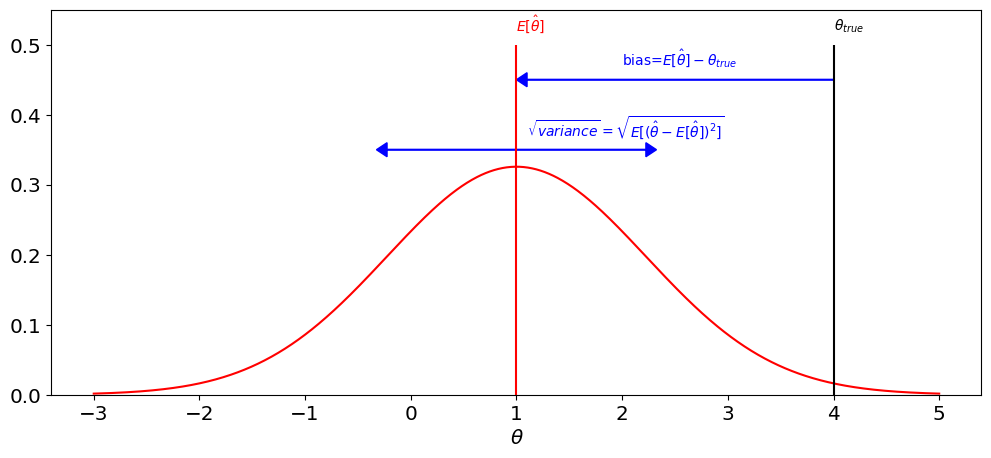

In [21]:
plt.figure(figsize=[12,5])

loc_true=4;
mse=1.5;
loc_est=1

x_support=np.linspace(-3,5,1000)
pdf=stats.norm.pdf(x_support,loc=loc_est,scale=np.sqrt(mse))

plt.plot(x_support,pdf,'r',label=r'$p(\hat\theta$')
plt.vlines(loc_true,0,0.5,color='k')
plt.vlines(loc_est,0,0.5,color='r')

plt.arrow(loc_true, 0.45, loc_est-loc_true+0.1, 0,head_width=0.02,head_length=0.1,color='b')
plt.arrow(loc_est, 0.35, -np.sqrt(mse), 0,head_width=0.02,head_length=0.1,color='b')
plt.arrow(loc_est, 0.35, +np.sqrt(mse), 0,head_width=0.02,head_length=0.1,color='b')

plt.ylim(0,0.55)
plt.xlabel(r'$\theta$')

plt.text(loc_true,0.52,r'$\theta_{true}$',color='k')
plt.text(loc_est,0.52,r'$E[\hat \theta]$',color='r')
plt.text(2,0.47,r'bias=$E[\hat \theta]-\theta_{true}$',color='b')
plt.text(1.1,0.37,r'$\sqrt{variance}=\sqrt{E[(\hat\theta-E[\hat \theta])^2]}$',color='b');


## Example: Gamma distribution

Let's now look at the case where are two parameters we want to estimate simultaneously. 

In this case, let's assume we are modelling our data as arising from a gamma distribution with parameters $\alpha$ and $\beta$:

$$X\sim \Gamma \left(\alpha,\beta\right)$$

and we want to estimate $\hat\alpha$ and $\hat\beta$ using $n$ measurements. Let's compare how the maximum likelihood estimators ($\hat\alpha_{mle},\hat\beta_{mle}$) and the method of moments estimators ($\hat\alpha_{mm},\hat\beta_{mm}$) compare.

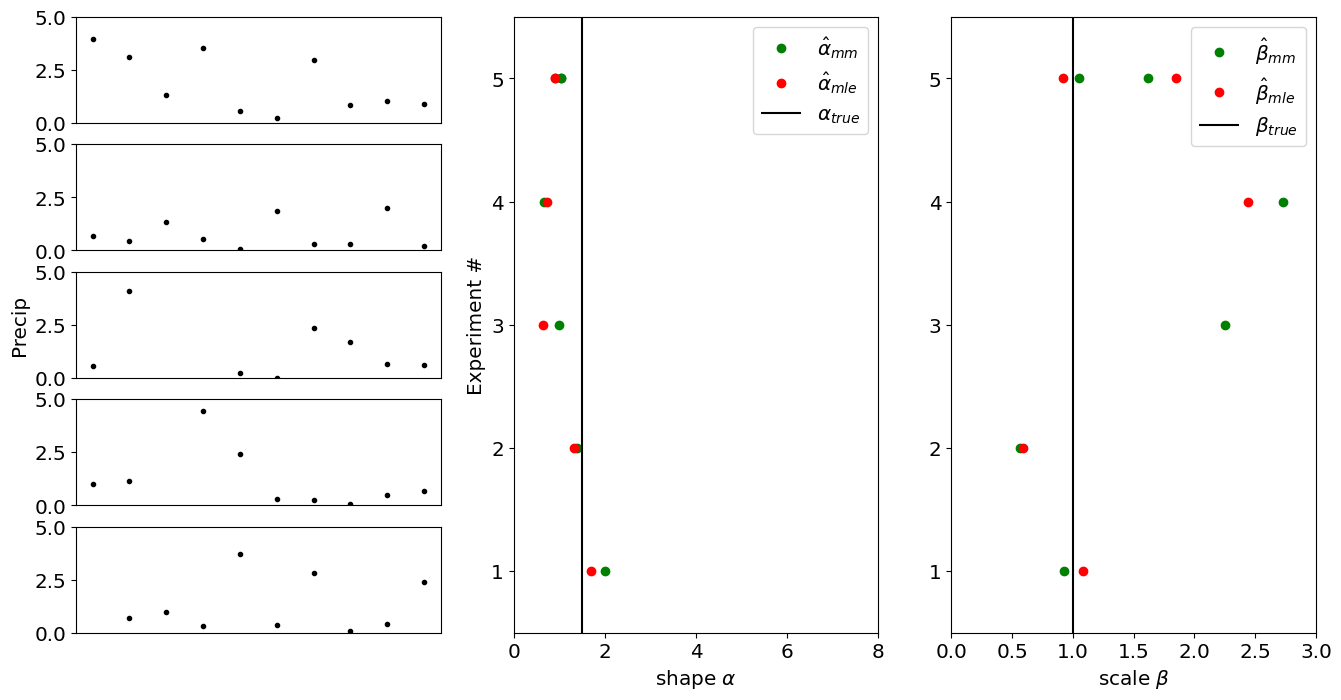

In [22]:
np.random.seed(seed=70)
n=10;
m=5;
loc=0
scale=1.5;
shape=1
plt.figure(figsize=[16,8])

for j in range(m): 
    X=stats.gamma.rvs(a=shape,loc=loc,scale=scale, size=n)

    out=stats.gamma.fit(X,floc=0,method='mle')
    shape_mle=out[0]
    scale_mle=out[2]
        
    out=stats.gamma.fit(X,floc=0,method='mm')
    shape_mm=out[0]
    scale_mm=out[2]

    
    #plt.subplot(1,3,1)
    plt.subplot(5,3,3*j+1)
    plt.plot(X,'k.')
    if j==2:
        plt.ylabel('Precip')
    plt.ylim(0,5)
    if j==5:
        plt.xlabel('rainy day #')
    if j<5:
        plt.xticks([])
    
    
    plt.subplot(1,3,2)
    plt.plot(shape_mm,j+1,'go')
    plt.plot(shape_mle,j+1,'ro')
    plt.yticks(np.arange(1,6))
    plt.ylabel('Experiment #')
    plt.xlabel(r'shape $\alpha$')
    
    if j==4:
        plt.plot(shape_mm,j+1,'go',label=r'$\hat\alpha_{mm}$')
        plt.plot(shape_mle,j+1,'ro',label=r'$\hat\alpha_{mle}$')
        plt.vlines(scale,0.5,5.5,label=r'$\alpha_{true}$',color='k')
        plt.legend()
        plt.xlim(0,8)
        plt.ylim(0.5,5.5)
    
    plt.subplot(1,3,3)
    plt.yticks(np.arange(1,6))
    plt.plot(scale_mm,j+1,'go')
    plt.plot(scale_mle,j+1,'ro')
    plt.xlabel(r'scale $\beta$')
    
    if j==4:
        plt.plot(shape_mm,j+1,'go',label=r'$\hat\beta_{mm}$')
        plt.plot(shape_mle,j+1,'ro',label=r'$\hat\beta_{mle}$')
        plt.vlines(shape,0.5,5.5,label=r'$\beta_{true}$',color='k')
        plt.legend()
        plt.xlim(0,3)
        plt.ylim(0.5,5.5)


We can increase the number $m$ of synthetic experiments, to get a sense for the distribution of each estimator:

(0.0, 3.0)

<Figure size 1600x800 with 0 Axes>

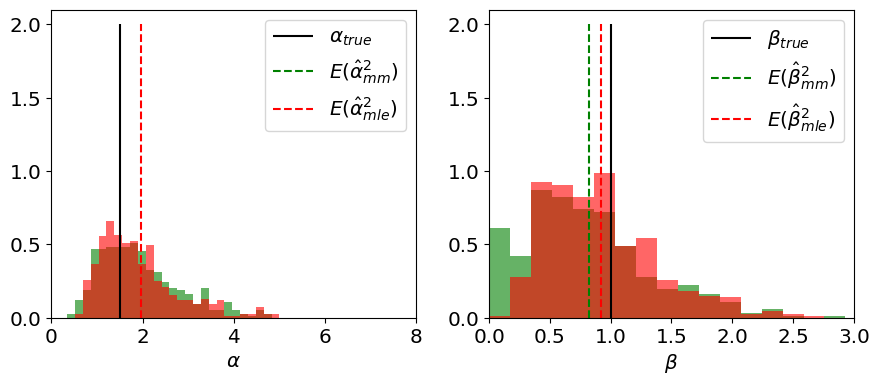

In [23]:
np.random.seed(seed=70)
n=10;
m=500;
loc=0
alpha_true=1.5;
beta_true=1
plt.figure(figsize=[16,8])

alpha_mle=np.zeros(m)
beta_mle=np.zeros(m)
alpha_mm=np.zeros(m)
beta_mm=np.zeros(m)

for j in range(m): 
    X=stats.gamma.rvs(a=alpha_true,loc=loc,scale=beta_true, size=n)

    out=stats.gamma.fit(X,floc=0,method='mle')
    alpha_mle[j]=out[0]
    beta_mle[j]=out[2]
        
    out=stats.gamma.fit(X,floc=0,method='mm')
    alpha_mm[j]=out[0]
    beta_mm[j]=out[2]
    

plt.figure(figsize=[16,4])

plt.subplot(1,3,2)
plt.hist(alpha_mm,bins=np.linspace(0,5,30), density='true',color='g',alpha=0.6)
plt.hist(alpha_mle,bins=np.linspace(0,5,30), density='true',color='r',alpha=0.6)
plt.xlim(0,8)
plt.xlabel(r'$\alpha$')

plt.vlines(alpha_true,0,2,label=r'$\alpha_{true}$',color='k')
plt.vlines(np.mean(alpha_mm),0,2,label=r'$E(\hat \alpha_{mm}^2$)',color='g',linestyle='--')
plt.vlines(np.mean(alpha_mle),0,2,label=r'$E(\hat \alpha_{mle}^2$)',color='r',linestyle='--')

plt.legend()

plt.subplot(1,3,3)
plt.hist(beta_mm,bins=np.linspace(0,5,30), density='true',color='g',alpha=0.6)
plt.hist(beta_mle,bins=np.linspace(0,5,30), density='true',color='r',alpha=0.6)

plt.xlabel(r'$\beta$')
plt.vlines(beta_true,0,2,color='k',label=r'$\beta_{true}$')
plt.vlines(np.mean(beta_mm),0,2,label=r'$E(\hat \beta_{mm}^2$)',color='g',linestyle='--')
plt.vlines(np.mean(beta_mle),0,2,label=r'$E(\hat \beta_{mle}^2$)',color='r',linestyle='--')
plt.legend()

plt.xlim(0,3)


        
    

We can also visualize  $\hat\alpha, \hat\beta$ in a 2D scatter plot:

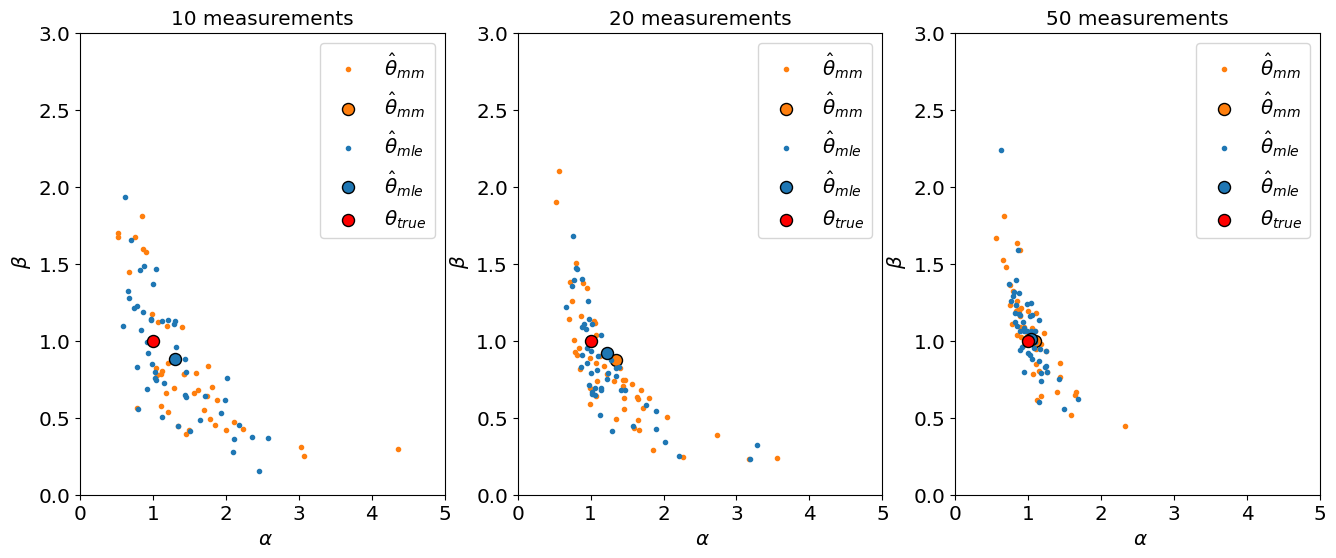

In [24]:
#Answer 
m=100
n=[10,20,50]
Nbins=30
v=50;
# scale for exponential distribution
alpha_true=1;
beta_true=1;

fig,ax=plt.subplots(1,3,figsize=[16,6])

# repeat the exericse for four value n.
for j in range(3):
    # preallocate vector of sample means
    alpha_mle=np.zeros(m)
    beta_mle=np.zeros(m)
    alpha_mm=np.zeros(m)
    beta_mm=np.zeros(m)
    # compute a number of sample means
    plt.subplot(1,3,j+1)
    for k in np.arange(m):
        # draw n[j] draws and average them to get the sample mean:
        X=stats.gamma.rvs(a=alpha_true,scale=beta_true,size=n[j])
        out=stats.gamma.fit(X,floc=0,method='mle')
        alpha_mle[k]=out[0]
        beta_mle[k]=out[2]
        
        out=stats.gamma.fit(X,floc=0,method='mm')
        alpha_mm[k]=out[0]
        beta_mm[k]=out[2]
        
    plt.scatter(alpha_mm[1:v],beta_mm[1:v],marker='.',label=r'$\hat{\theta}_{mm}$',color='tab:orange')
    plt.scatter(np.mean(alpha_mm),np.mean(beta_mm),s=75,label=r'$\hat{\theta}_{mm}$',color='tab:orange',edgecolor='k')
    
    plt.scatter(alpha_mle[1:v],beta_mle[1:v],marker='.',label=r'$\hat{\theta}_{mle}$',color='tab:blue')
    plt.scatter(np.mean(alpha_mle),np.mean(beta_mle),s=75,label=r'$\hat{\theta}_{mle}$',color='tab:blue',edgecolor='k')
    
    plt.scatter(alpha_true,beta_true,s=75,label=r'$\theta_{true}$',color='r',edgecolor='k')

    plt.xlabel(r' $\alpha$')
    plt.ylabel(r' $\beta$')
    plt.title(str(n[j])+' measurements')
    
    plt.xlim(0,5)
    plt.ylim(0,3)
    plt.legend()
    

Notice that for $n=10$ measurements, the $E[\hat\alpha_{mm}]$ is outside the plot. For 20 measurements, there is still significant bias in $\alpha_{mm}$. So for small number of measurements, the mle estimator is much better than the method of moments for estimating the parameters of a gamma distribution. 